### iSIM-sigma vs random sampling

In this notebook we plot the errors of three trials of random sampling, increasing the number of randomly sampled molecules. The results were computed from the errors_random.py script.

32300


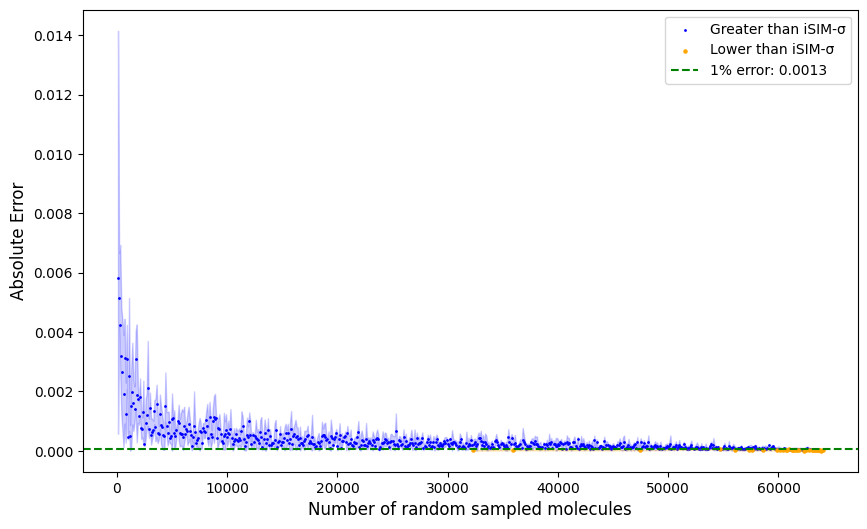

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data = pd.read_csv('isim_sigma_results/random_sigma_errors_.csv')

# Test the time complexity 

size = np.array(data['n'])

isim_sigma_error = 6.387243812758236e-05

bools = []
means = []
mins = []
maxs = []
for row in data.iterrows():
    bools.append(row[1]['Trial_0'] < isim_sigma_error and row[1]['Trial_1'] < isim_sigma_error and row[1]['Trial_2'] < isim_sigma_error)
    means.append(np.mean([row[1]['Trial_0'], row[1]['Trial_1'], row[1]['Trial_2']]))
    mins.append(np.min([row[1]['Trial_0'], row[1]['Trial_1'], row[1]['Trial_2']]))
    maxs.append(np.max([row[1]['Trial_0'], row[1]['Trial_1'], row[1]['Trial_2']]))
means, mins, maxs = np.array(means), np.array(mins), np.array(maxs)
bools = np.array(bools)

print(size[bools][0])

# Plot the results, use the mean to plot the point and the max and min to plot the error bars.
plt.figure(figsize=(10, 6))

plt.scatter(size[~bools], means[~bools], label=f'Greater than iSIM-{chr(963)}', color='blue', s=1)
plt.fill_between(size[~bools], mins[~bools], maxs[~bools], color='blue', alpha=0.2)

plt.scatter(size[bools], means[bools], label=f'Lower than iSIM-{chr(963)}', color='orange', s=5)
plt.fill_between(size[bools], mins[bools], maxs[bools], color='orange', alpha=0.2)
plt.axhline(y=isim_sigma_error, color='green', linestyle='--', label=f'1% error: 0.0013')

plt.xlabel('Number of random sampled molecules', size=12)
plt.ylabel('Absolute Error', size=12)

plt.legend()
plt.savefig('figures/random_sigma_errors.png', dpi=400, bbox_inches='tight')
plt.show()